# Python机器学习项目的模板

## 1. 定义问题
### a) 导入类库
### b) 导入数据集

## 2. 理解数据
### a) 描述性统计
### b) 数据可视化

## 3. 数据准备
### a) 数据清洗
### b) 特征选择
### c) 数据转换

## 4. 评估算法
### a) 分离数据集
### b) 定义模型评估标准
### c) 算法审查
### d) 算法比较

## 5. 优化模型
### a) 算法调参
### b) 集成算法

## 6. 结果部署
### a) 预测评估数据集
### b) 利用整个数据集生成模型
### c) 序列化模型

## 1）a) 导入类库

In [2]:
import numpy as np
from numpy import arange

from matplotlib import pyplot

import pandas as pd          #  pandas 0.18.1 documentation
from pandas import read_csv
from pandas import  set_option
from pandas.plotting import scatter_matrix

import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler        # 特征缩放
from sklearn.model_selection import train_test_split    # 训练集 测试集
from sklearn.model_selection import KFold               # K折交叉验证
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression      # LR
from sklearn.linear_model import Lasso                 # LASSO
from sklearn.linear_model import ElasticNet            # EN
from sklearn.tree import DecisionTreeRegressor         # DTR
from sklearn.neighbors import KNeighborsRegressor      # KNR
from sklearn.svm import SVR 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

## 1）b) 导入数据集

In [6]:
# 可以直接通过datasets导入数据集

boston = datasets.load_boston()  # 导入数据集
x = boston.data    # 获得其特征向量
y = boston.target  # 获得样本label

print (x.shape)    # boston.data.shape
print (y.shape)

# x.head() 只有pandas的DataFrame有head()，tail()方法; 'numpy.ndarray' object has no attribute 'head'

(506, 13)
(506,)


In [5]:
#  为了方便将数据保存下来，导入

filename = 'G:/boston.csv '   # G:/ 或者 G:\\
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
         'RAD', 'TAX', 'PRTATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filename, names=names, delim_whitespace=True)    # 导入为DataFrame对象

## 2) a) 描述性统计

In [23]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
set_option('display.width', 120)  # 指定输出的宽度为120个字符，以确保将所有特征属性值显示在一行内
print(data.head(8))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PRTATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0     18.7  396.90   5.33  36.2
5  0.02985   0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222.0     18.7  394.12   5.21  28.7
6  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311.0     15.2  395.60  12.43  22.9
7  0.14455  12.5   7.87     0  0.524  6.172  96.1  5.9505    5  311.0     15.2  396.90  19.15  27.1


In [26]:
data.shape

(506, 14)

In [27]:
data.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PRTATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [29]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PRTATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [37]:
data.describe() # 描述性统计信息中包含数据的均值、方差、最大值、最小值、中位值、四分位值

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [38]:
data.describe

<bound method NDFrame.describe of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  PRTATIO       B  LSTAT  MEDV
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0     15.3  396.90   4.98  24.0
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0     17.8  396.90   9.14  21.6
2     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0     17.8  392.83   4.03  34.7
3     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0     18.7  394.63   2.94  33.4
4     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0     18.7  396.90   5.33  36.2
5     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0     18.7  394.12   5.21  28.7
6     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0     15.2  395.60  12.43  22.9
7     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0     15.2  396.90  19.15  27.1
8     0.21124  12.5   7.87    

In [39]:
# 关联关系
set_option('precision', 2)
print(data.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  PRTATIO     B  LSTAT  MEDV
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58     0.29 -0.39   0.46 -0.39
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31    -0.39  0.18  -0.41  0.36
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72     0.38 -0.36   0.60 -0.48
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04    -0.12  0.05  -0.05  0.18
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67     0.19 -0.38   0.59 -0.43
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29    -0.36  0.13  -0.61  0.70
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51     0.26 -0.27   0.60 -0.38
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53    -0.23  0.29  -0.50  0.25
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 

##  2) b) 数据可视化

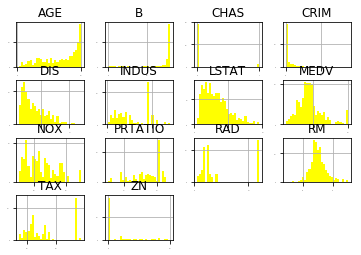

In [58]:
# 数据可视化
# 单一特征图表


# 直方图
data.hist(bins=30, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, facecolor='yellow')
# bins 指定箱子的宽度，取正整数
pyplot.show()

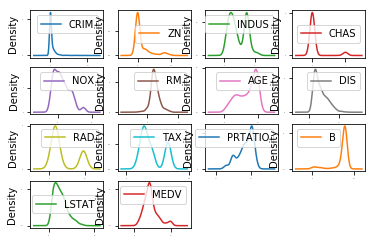

In [51]:
# 密度图
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1)
pyplot.show()

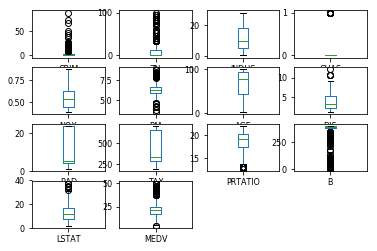

In [52]:
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
pyplot.show()

### 散点矩阵图

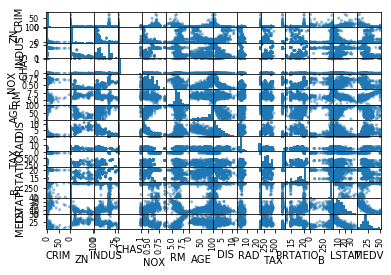

In [59]:
# 多重数据图表
# 接下来利用多重数据图表来查看不同数据特征之间的相互影响关系


# 散点矩阵图
scatter_matrix(data)
pyplot.show()

### 相关矩阵图

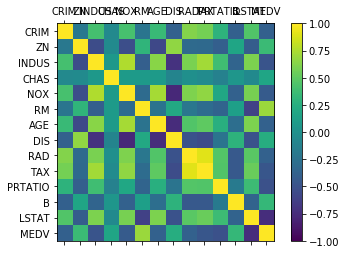

In [60]:
# 相关矩阵图
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, 14, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

## 4) a) 分离数据集

In [6]:
# 分离数据集

array = data.values
X = array[:, 0:13]
Y = array[:, 13]
validation_size = 0.2  # 分离出20%的数据作为评估数据集，80%的数据作为训练数据集
seed = 7  # 随机数的种子
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)
X_train.shape   # (404,13) 的array
Y_train.shape   # (404,)

(404,)

## 4) b) 定义模型评估标准

In [8]:
# 评估算法 —— 评估标准
# 由于部分数据的线性分布，线性回归算法和弹性网络回归算法对解决问题可能比较有效。
# 由于数据的离散化，通过决策树算法或支持向量机算法也许可以生成高准确度的模型

num_folds = 10  # 采用10折交叉验证来分离数据
seed = 7
scoring = 'neg_mean_squared_error' # 通过均方误差来比较算法的准确度。均方误差越趋近于0，算法准确度越高

## 4) c) 算法评估 比较

In [9]:
# 对原始数据不做任何处理，对算法进行一个评估，形成一个算法的评估基准baseline。
# 这个基准值是对  后续算法改善  优劣比较的基准值。
# 我们选择三个线性算法和三个非线性算法来进行比较。

#   线性算法： 线性回归（LR）、套索回归（LASSO）和弹性网络回归（EN）。 
# 非线性算法：分类与回归树（CART）、支持向量机（SVM）和K近邻算法（KNN）。


# 评估算法 - baseline
models = {}
models['LR'] = LinearRegression()
models['LASSO'] = Lasso()
models['EN'] = ElasticNet()
models['KNN']  = KNeighborsRegressor()
models['CART'] = DecisionTreeRegressor()
models['SVM'] = SVR()

In [10]:
# 评估算法
results = []
for key in models:
    # K折交叉验证：sklearn.model_selection.KFold(n_splits=3, shuffle=False, random_state=None)
    # 思路：将训练/测试数据集划分n_splits个互斥子集，每次用其中一个子集当作验证集，剩下的n_splits-1个作为训练集，
    # 进行n_splits次训练和测试，得到n_splits个结果    
    kfold = KFold(n_splits=num_folds, random_state=seed)
    
    # Cross Validation 交叉验证  cross_val_score  得分[0,1]
    cv_result = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%6s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))
    # print(cv_result.shape) # (10,) 每种算法返回10个结果 cv_result
    # print(results)

    LR: -21.379856 (9.414264)
 LASSO: -26.423561 (11.651110)
    EN: -27.502259 (12.305022)
   KNN: -41.896488 (13.901688)
  CART: -22.695635 (9.566845)
   SVM: -85.518342 (31.994798)


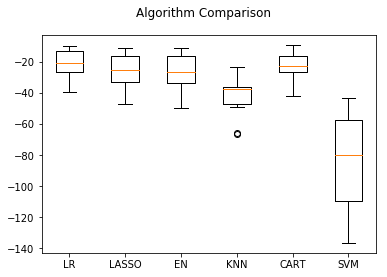

In [11]:
#评估算法——箱线图 上面是10折交叉验证的均值方差，下面是所有10个结果画成的箱图

fig = pyplot.figure()  # 子图
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111) # 返回Axes实例，三个参数分别为子图总行数、总列数、位置
pyplot.boxplot(results)
ax.set_xticklabels(models.keys()) # 设置x轴
pyplot.show()

从图中可以看到，线性算法的分布比较类似，并且K近邻算法的结果分布非常紧凑。

## 不同的数据度量单位，也许是K近邻算法和支持向量机算法表现不佳的主要原因。

## 下面将对数据进行  正态化处理，再次比较算法的结果。

## 评估算法

In [97]:
# 评估算法——正态化数据
# Pipeline(memory=None,
#        steps=[('anova', SelectKBest(...)),
#               ('svc', SVC(...))])
#  Pipeline对象接受二元tuple构成的list，
# 每一个二元 tuple 中的第一个元素为 arbitrary identifier string，我们用以获取（access）Pipeline object 中的 
# individual elements，
# 二元 tuple 中的第二个元素是 scikit-learn与之相适配的transformer 或者 estimator。

# Pipeline中的步骤可能有：
# 特征标准化是需要的，可作为第一个环节
# 既然是分类器，classifier也是少不了的，自然是最后一个环节
# 中间可加上比如...

pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])
pipelines['ScalerLASSO'] = Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])
pipelines['ScalerEN'] = Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVR())])
print(pipelines) # Pipeline返回

results = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%11s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

{'ScalerLR': Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]), 'ScalerLASSO': Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LASSO', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]), 'ScalerEN': Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('EN', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]), 'ScalerKNN': Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNe

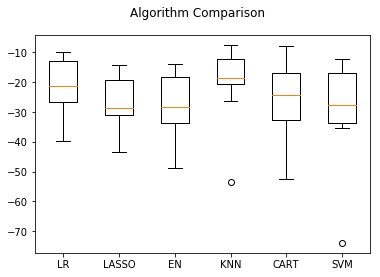

In [75]:
#评估算法——箱线图  箱线图 上面是10折交叉验证的均值方差，下面是所有10个结果画成的箱图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

# 优化模型

## 调参

In [18]:
# 网格搜索算法  调参——KNN     

# fit  transform
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)

# 网格搜索算法
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print(grid_result)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

print(grid_result.cv_results_)
cv_results = zip(grid_result.cv_results_['mean_test_score'],grid_result.cv_results_['std_test_score'],grid_result.cv_results_['params'])
print(cv_results)

for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
       error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)
最优：-18.1721369637 使用{'n_neighbors': 3}
{'mean_fit_time': array([ 0.00110025,  0.00079992,  0.00040009,  0.00070002,  0.00090001,
        0.00099845,  0.00069947,  0.00089912,  0.00059988,  0.00069916,
        0.0004997 ]), 'std_fit_time': array([ 0.00053917,  0.00060047,  0.00049001,  0.00045827,  0.00030001,
        0.00044537,  0.00045791,  0.00029971,  0.0004898 ,  0.00045771,
        0.0004997 ]), 'mean_score_time': array([ 0.0019994 ,  0.00119898,  0.0011986 ,  0.00139873, 

最优结果——K近邻算法的默认参数近邻个数（n_neighbors）是3

## 集成算法

In [14]:
# 集成算法
# 除调参之外，提高模型准确度的方法是使用集成算法。
# 下面会对表现比较好的线性回归、K近邻、分类与回归树算法进行集成，来看看算法能否提高。

# 装袋算法：随机森林（RF）和极端随机树（ET）。 
# 提升算法：AdaBoost（AB）和随机梯度上升（GBM）。

#依然采用和前面同样的评估框架和正态化之后的数据来分析相关的算法。代码如下：


ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler',StandardScaler()), ('AB', AdaBoostRegressor())])
ensembles['ScaledAB-KNN'] = Pipeline([('Scaler', StandardScaler()), ('ABKNN', AdaBoostRegressor(base_estimator= KNeighborsRegressor(n_neighbors=3)))])
ensembles['ScaledAB-LR'] = Pipeline([('Scaler', StandardScaler()), ('ABLR',AdaBoostRegressor(LinearRegression()))])
ensembles['ScaledRFR'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestRegressor())])
ensembles['ScaledETR'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesRegressor())])
ensembles['ScaledGBR'] = Pipeline([('Scaler', StandardScaler()), ('RBR', GradientBoostingRegressor())])

results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%12s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

    ScaledAB: -14.729143 (6.315653)
ScaledAB-KNN: -15.902224 (10.378037)
 ScaledAB-LR: -24.575570 (10.124618)
   ScaledRFR: -12.213231 (6.247711)
   ScaledETR: -11.077000 (4.710833)
   ScaledGBR: -10.269140 (4.530608)


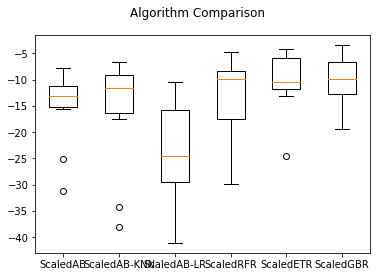

In [79]:
# 集成算法——集成算法在10折交叉验证中均方误差的分布状况
# 箱线图   上面是10折交叉验证的均值方差(最终结果)，下面是所有10个结果画成的箱图（每个具体的分布）
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(ensembles.keys())
pyplot.show()

In [80]:
# 下面对随机梯度上升（GBM）和极端随机树（ET）算法进行调参，再次比较这两个算法模型的准确度，来确定最终的算法模型

# 集成算法GBM——调参  

# fit  transform
caler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))


# 集成算法ET——调参

# fit  transform
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

param_grid = {'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))


最优：-9.24928559386 使用{'n_estimators': 800}
最优：-9.20539812871 使用{'n_estimators': 50}


## 6) 结果部署

In [16]:
# 确定最终模型
# 我们已经确定了使用极端随机树（ET）算法来生成模型，下面就对该算法进行训练和生成模型，并计算模型的准确度。

#训练模型
caler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
gbr = ExtraTreesRegressor(n_estimators=80)
gbr.fit(X=rescaledX, y=Y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
# 评估算法模型
rescaledX_validation = scaler.transform(X_validation)
predictions = gbr.predict(rescaledX_validation)
print(mean_squared_error(Y_validation, predictions))

13.1892927543
